<h1 style = "font-size:3rem;color:darkcyan"> Training a Neural Network </h1>

implementing backward propagation from scratch


In [307]:
# import libraries
import numpy as np
import math
from random import random
import matplotlib.pyplot as plt

In [303]:
class ANN:
    
    def __init__(self,n_inputs = 3, hidden_layer_sizes = [3,4], n_targets = 1):
        self.n_inputs = n_inputs
        self.hidden_layer_sizes = hidden_layer_sizes
        self.n_targets = n_targets
        
        layers = [self.n_inputs] + self.hidden_layer_sizes + [self.n_targets]
        print(layers)
        
        # initialize random weights, empty derivatives and activations
        self.weights = []
        self.derivatives = []
        for i in range(len(layers)-1):
            W = np.random.rand(layers[i], layers[i+1])
            self.weights.append(W)
            
            d = np.zeros((layers[i], layers[i+1]))
            self.derivatives.append(d)
            
        self.activations = []
        for i in range(len(layers)):
            a = np.zeros(layers[i])
            self.activations.append(a)
        
    def _sigmoid(self, h):
        a = 1 / (1 + math.e**(-h))
        return a
    
    def _sigmoid_dh(self, x):
        da = x - (1.0 - x)
        return da
    
    def _activate(self, inputs, W):
        h = np.dot(inputs, W) # summation

        activation = self._sigmoid(h) # modulation
        return activation
    
    def _forward_propagate(self, inputs):
        activations = inputs
        self.activations[0] = activations
        for i in range(len(self.weights)):
            activations = self._activate(activations, self.weights[i])
            self.activations[i+1] = activations
        return activations
    
    def _back_propagate(self, error):
        # calculate error gradient
        #error_gradient = self.a[len(weights)] - targets[len(weights)]
        
        for i in reversed(range(len(self.weights))):
            activations = self.activations[i+1]
            delta = error * self._sigmoid_dh(activations)
            
            delta_reshaped =  delta.reshape(delta.shape[0], -1).T
            current_activations = self.activations[i]
            current_activations_reshaped = current_activations.reshape(current_activations.shape[0], -1)
            
            #print(current_activations.shape)
            self.derivatives[i] = np.dot(current_activations_reshaped, delta_reshaped)
            error = np.dot(delta, self.weights[i].T)
            
            # print(f'W[{i}] = {self.derivatives[i]}')
        return error
         
    def _gradient_descent(self, learning_rate):
        for i in range(len(self.weights)):
            self.weights[i] += self.derivatives[i] * learning_rate
   
    def _mse(self, target, output):
        return np.average((target - output)**2)
    
    def train_neural_network(self, inputs, targets, learning_rate, max_epochs):
        #if np.array(inputs).size != self.n_inputs:
         #   print("Number of inputs does not match the input layer!")
          #  return None
        
        #if np.array(targets).size != self.n_targets:
       #     print("Number of targets does not match the output layer!")
         #   return None
        
        # repeat for max_epochs or when target error rate is achieved
        for i in range(max_epochs):
            sum_error = 0
            for input,target in zip(inputs, targets):
                # propagate forward
                output = self._forward_propagate(input)

                # calculate new error
                error = target - output

                # propagate backward
                self._back_propagate(error)

                # gradient descent
                self._gradient_descent(learning_rate)

                # calc sum error & print
                sum_error += self._mse(target, output)
            
            # print error after each epoch
            print(f'Error = {sum_error / len(inputs)} at epoch {i}')
        
        print(f'number of epochs exceeded ({i})')
        return self._forward_propagate(inputs)


In [304]:
ann = ANN(2, [5], 1)

[2, 5, 1]


In [312]:
learning_rate = 0.1
epochs = 50

inputs = np.array([[random() / 2 for _ in range(2)] for _ in range(1000)])
targets = np.array([[i[0] + i[1]] for i in inputs])

out = ann.train_neural_network(inputs, targets, learning_rate, epochs)

Error = 0.03577762652534582 at epoch 0
Error = 0.03582690692112693 at epoch 1
Error = 0.036026462802270925 at epoch 2
Error = 0.036223746499370935 at epoch 3
Error = 0.03641780785745958 at epoch 4
Error = 0.03660789472196341 at epoch 5
Error = 0.036793426231260466 at epoch 6
Error = 0.036973967961501646 at epoch 7
Error = 0.037149209323342494 at epoch 8
Error = 0.03731894337402861 at epoch 9
Error = 0.037483049045755445 at epoch 10
Error = 0.03764147568669126 at epoch 11
Error = 0.037794229748834264 at epoch 12
Error = 0.03794136342463437 at epoch 13
Error = 0.03808296502259622 at epoch 14
Error = 0.038219150873909244 at epoch 15
Error = 0.03835005857241373 at epoch 16
Error = 0.038475841365328355 at epoch 17
Error = 0.0385966635296307 at epoch 18
Error = 0.03871269658715168 at epoch 19
Error = 0.03882411622923398 at epoch 20
Error = 0.038931099838569995 at epoch 21
Error = 0.03903382451122504 at epoch 22
Error = 0.03913246549569641 at epoch 23
Error = 0.03922719497814014 at epoch 24
E

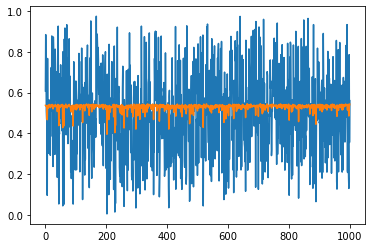

In [315]:
#plt.plot(inputs[0])
plt.plot(targets)
plt.plot(out)